In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [51]:
from patsy import dmatrix, dmatrices

from pygam import LinearGAM, LogisticGAM, f, l, s

import statsmodels.api as sm
import statsmodels.stats.api as sma
from statsmodels.gam.api import GLMGam, BSplines, CyclicCubicSplines
from scipy import stats

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
wage = pd.read_csv('data/Wage.csv')

In [5]:
wage.describe(include='all')

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000,3000,3000,3000,3000,3000,3000,3000,3000.000000,3000.000000
unique,NaN,NaN,NaN,1,5,4,5,1,2,2,2,NaN,NaN
top,NaN,NaN,NaN,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,NaN,NaN
freq,NaN,NaN,NaN,3000,2074,2480,971,3000,1544,2142,2083,NaN,NaN
mean,218883.373000,2005.791000,42.414667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653905,111.703608
std,145654.072587,2.026167,11.542406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.857332,128.680488


In [6]:
wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [7]:
polynomial_features= PolynomialFeatures(degree=4)
X_age = polynomial_features.fit_transform(wage['age'].values.reshape(-1, 1))
X_age.shape

(3000, 5)

In [8]:
mod = sm.OLS(wage['wage'], X_age)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           2.77e-57
Time:                        16:44:33   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.0

In [9]:
min_age, max_age = min(wage['age']), max(wage['age'])
grid_age = np.arange(min_age, max_age + 1)

In [10]:
X_grid_age = polynomial_features.fit_transform(grid_age.reshape(-1, 1))
fit_grid = res.get_prediction(X_grid_age)

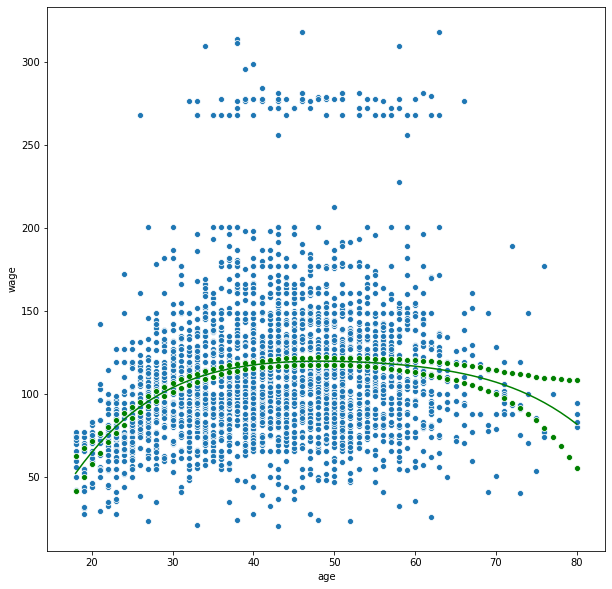

In [11]:
ax = sns.scatterplot(x='age', y='wage', data=wage)
sns.lineplot(x=grid_age, y=fit_grid.predicted_mean, color='g')
sns.scatterplot(x=grid_age, y=fit_grid.conf_int()[:,1], color='g')
sns.scatterplot(x=grid_age, y=fit_grid.conf_int()[:,0], color='g')

In [12]:
y, X_2 = dmatrices('wage ~ education', 
                 data=wage, return_type='dataframe')

mod = sm.OLS(wage['wage'], X_2)    # Describe model
res2 = mod.fit()       # Fit model

In [13]:
y, X_3 = dmatrices('wage ~ education + age', 
                 data=wage, return_type='dataframe')

mod = sm.OLS(wage['wage'], X_3)    # Describe model
res3 = mod.fit()       # Fit model

In [14]:
y, X_4 = dmatrices('wage ~ education + age + I(age**2)', 
                 data=wage, return_type='dataframe')

mod = sm.OLS(wage['wage'], X_4)    # Describe model
res4 = mod.fit()       # Fit model

In [15]:
y, X_5 = dmatrices('wage ~ education + age + I(age**2) + I(age**3)', 
                 data=wage, return_type='dataframe')

mod = sm.OLS(wage['wage'], X_5)    # Describe model
res5 = mod.fit()       # Fit model

In [16]:
sma.anova_lm(res2, res3, res4, res5)

/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2995.0,3.995721e+06,0.0,NaN,NaN,NaN
1,2994.0,3.867992e+06,1.0,127728.879350,102.737760,9.209714e-24
2,2993.0,3.725395e+06,1.0,142597.097010,114.696898,2.728001e-26
3,2992.0,3.719809e+06,1.0,5586.660322,4.493588,3.410431e-02


### Polynomial logistic regression

In [17]:
y, X = dmatrices('I(wage>250) ~  age + I(age**2) + I(age**3)', 
                 data=wage, return_type='dataframe')


In [18]:
mod = sm.Logit(y.iloc[:,1], X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

Optimization terminated successfully.
         Current function value: 0.117987
         Iterations 10
                            Logit Regression Results                           
Dep. Variable:     I(wage > 250)[True]   No. Observations:                 3000
Model:                           Logit   Df Residuals:                     2996
Method:                            MLE   Df Model:                            3
Date:                 Thu, 02 Apr 2020   Pseudo R-squ.:                 0.03095
Time:                         16:44:34   Log-Likelihood:                -353.96
converged:                        True   LL-Null:                       -365.27
Covariance Type:             nonrobust   LLR p-value:                 4.862e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -17.1342      6.665     -2.571      0.010     -30.198      -4.070
age             0

In [19]:
y_age = wage['wage']> 250

In [20]:
polynomial_features= PolynomialFeatures(degree=3)
X_age = polynomial_features.fit_transform(wage['age'].values.reshape(-1, 1))
X_age.shape

(3000, 4)

In [21]:
mod = sm.Logit(y_age, X_age)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

Optimization terminated successfully.
         Current function value: 0.117987
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   wage   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2996
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 Apr 2020   Pseudo R-squ.:                 0.03095
Time:                        16:44:34   Log-Likelihood:                -353.96
converged:                       True   LL-Null:                       -365.27
Covariance Type:            nonrobust   LLR p-value:                 4.862e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1342      6.665     -2.571      0.010     -30.198      -4.070
x1             0.7251      0

In [22]:
logit_model = sm.GLM(y_age, X_age, family=sm.families.Binomial())
res = logit_model.fit()       # Fit model
print(res.summary())   # Summarize model

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -353.96
Date:                Thu, 02 Apr 2020   Deviance:                       707.92
Time:                        16:44:34   Pearson chi2:                 2.82e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1342      6.665     -2.571      0.0

In [23]:
X_grid_age = polynomial_features.fit_transform(grid_age.reshape(-1, 1))
fit_grid = res.get_prediction(X_grid_age)

[(0, 0.1)]

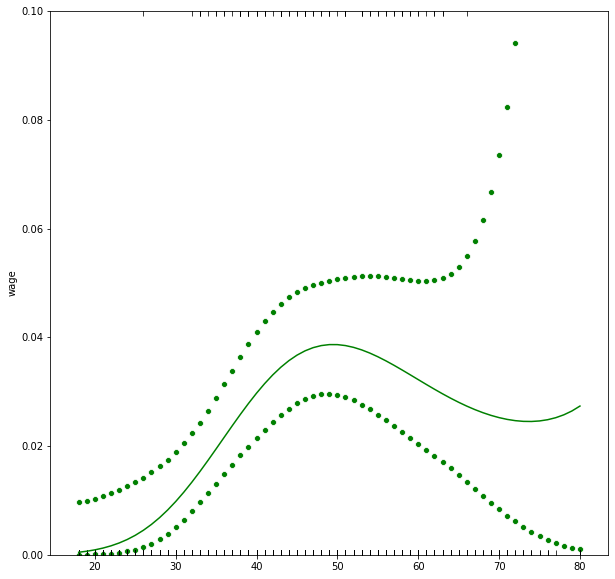

In [24]:
ax = sns.lineplot(x=grid_age, y=fit_grid.predicted_mean, color='g')
sns.scatterplot(x=grid_age, y=fit_grid.conf_int()[:,1], color='g')
sns.scatterplot(x=grid_age, y=fit_grid.conf_int()[:,0], color='g')
sns.scatterplot(x=X_age[:,1], y=y_age/10, marker="|", color='black', s=100)
ax.set(ylim=(0, 0.1))

### Spline

In [25]:
y, X = dmatrices('wage ~  bs(age, knots=[25,40,60], degree=3, include_intercept=False)', 
                 data=wage, return_type='dataframe')

In [26]:
mod = sm.GLM(y, X)
res = mod.fit()       # Fit model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2993
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1594.0
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Thu, 02 Apr 2020   Deviance:                   4.7708e+06
Time:                        16:44:35   Pearson chi2:                 4.77e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            60.4937      9.460      6.394      0.000      41.952      79.036
bs(age, knots=[25, 40, 60], degree=3, include_intercept=False)[0]     3.9805     12.538      0.317      0.751     -20.593      28.554
bs(age, knots=[25, 40, 60], degree=3, include_intercept=False)[1]    44.6310      9.626      4.636      0.000      25.764      63.498
bs(age, knots=[25, 40, 60], degree=3, include_intercept=False)[2]    62.8388     10.755      5.843      0.000      41.759      83.919
bs(age, knots=[25, 40, 60], degree=3, include_intercept=False)[3]    55.9908     10.706      5.230      0.000      35.007      76.975
bs(age, knots=[25, 40, 60], degree=3, include_intercept=False)[4]    50.6881     14.402      3.520      0.000      22.461      78.915
bs(age, knots=[25, 40, 60], degree=3, include_intercept=False)[5]    16.6061     19.126      0.868      0.385     -20.881      54.093
=====================================================================================================================================
"""

In [27]:
spline_grid = dmatrix('bs(grid_age, knots=[25,40,60], degree=3, include_intercept=False)', return_type='dataframe')
fit_grid = res.get_prediction(spline_grid)

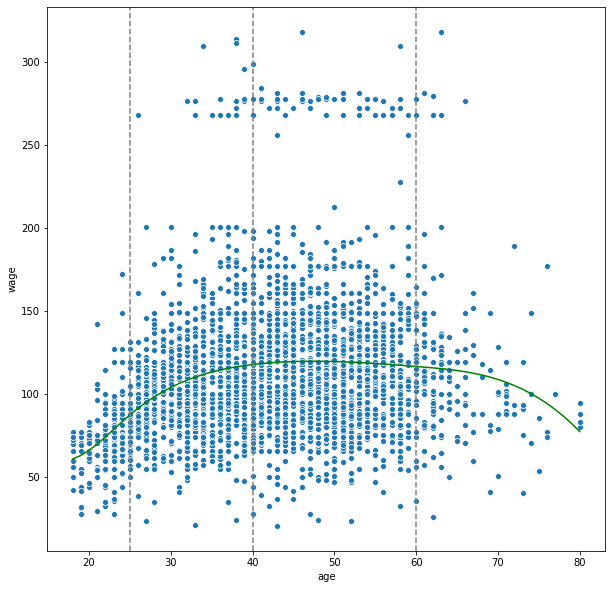

In [28]:
ax = sns.scatterplot(x='age', y='wage', data=wage)
sns.lineplot(x=grid_age, y=fit_grid.predicted_mean, color='g')
ax.axvline(25, ls='--', color="grey")
ax.axvline(40, ls='--', color="grey")
ax.axvline(60, ls='--', color="grey")

### smoothing spline

In [29]:
y, X = dmatrices('wage ~  cr(age, df=16)', data=wage, return_type='dataframe')

In [30]:
mod = sm.GLM(y, X)
res2 = mod.fit()       # Fit model
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2984
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                          1592.5
Method:                          IRLS   Log-Likelihood:                -15308.
Date:                Thu, 02 Apr 2020   Deviance:                   4.7505e+06
Time:                        16:44:36   Pearson chi2:                 4.75e+06
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             97.8541      1.577     62.033      0.000      94.762     100.946
cr(age, df=16)[0]    -36.9817      8.357     -4.425      0.000     -53.361     -20.603
cr(age, df=16)[1]    -25.0900      4.057     -6.185      0.000     -33.041     -17.139
cr(age, df=16)[2]     -4.9769      3.296     -1.510      0.131     -11.437       1.483
cr(age, df=16)[3]      5.0870      3.032      1.678      0.093      -0.856      11.030
cr(age, df=16)[4]     11.3835      2.833      4.019      0.000       5.831      16.936
cr(age, df=16)[5]     22.0361      2.768      7.961      0.000      16.611      27.462
cr(age, df=16)[6]     19.9764      2.675      7.467      0.000      14.733      25.220
cr(age, df=16)[7]     23.7275      2.707      8.765      0.000      18.422      29.033
cr(age, df=16)[8]     16.8947      2.751      6.142      0.000      11.504      22.286
cr(age, df=16)[9]     20.6820      3.029      6.827      0.000      14.745      26.619
cr(age, df=16)[10]    20.9521      3.410      6.144      0.000      14.268      27.636
cr(age, df=16)[11]    23.8629      4.159      5.738      0.000      15.712      32.014
cr(age, df=16)[12]    10.6809      6.679      1.599      0.110      -2.410      23.772
cr(age, df=16)[13]     0.4100      8.421      0.049      0.961     -16.096      16.916
cr(age, df=16)[14]    -0.6704     10.617     -0.063      0.950     -21.480      20.139
cr(age, df=16)[15]   -10.1200     18.334     -0.552      0.581     -46.054      25.814
======================================================================================
"""

In [31]:
spline_grid2 = dmatrix('cr(grid_age, df=16)', return_type='dataframe')
fit_grid2 = res2.get_prediction(spline_grid2)

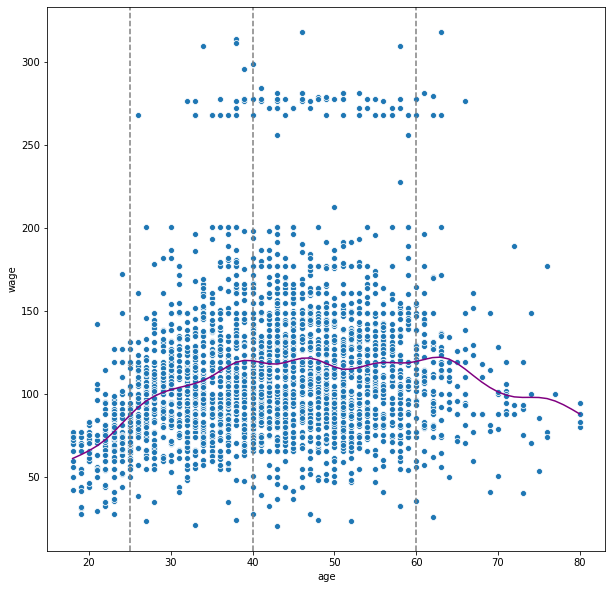

In [32]:
ax = sns.scatterplot(x='age', y='wage', data=wage)
sns.lineplot(x=grid_age, y=fit_grid2.predicted_mean, color='purple')
ax.axvline(25, ls='--', color="grey")
ax.axvline(40, ls='--', color="grey")
ax.axvline(60, ls='--', color="grey")

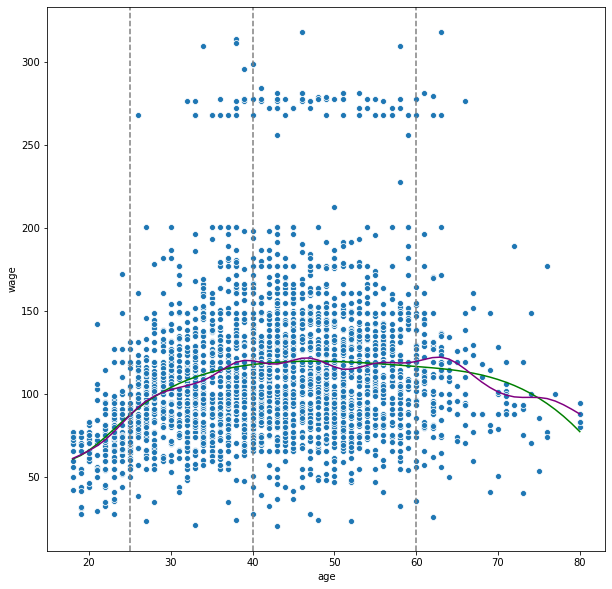

In [33]:
ax = sns.scatterplot(x='age', y='wage', data=wage)
sns.lineplot(x=grid_age, y=fit_grid.predicted_mean, color='g')
sns.lineplot(x=grid_age, y=fit_grid2.predicted_mean, color='purple')
ax.axvline(25, ls='--', color="grey")
ax.axvline(40, ls='--', color="grey")
ax.axvline(60, ls='--', color="grey")

### Generalized Additive Models

In [34]:
wage['education'] = pd.Categorical(wage['education'])
wage['education'] = wage['education'].cat.codes

In [68]:
X, y = wage[['age', "year", 'education']].values, wage['wage'].values

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<Figure size 720x720 with 0 Axes>

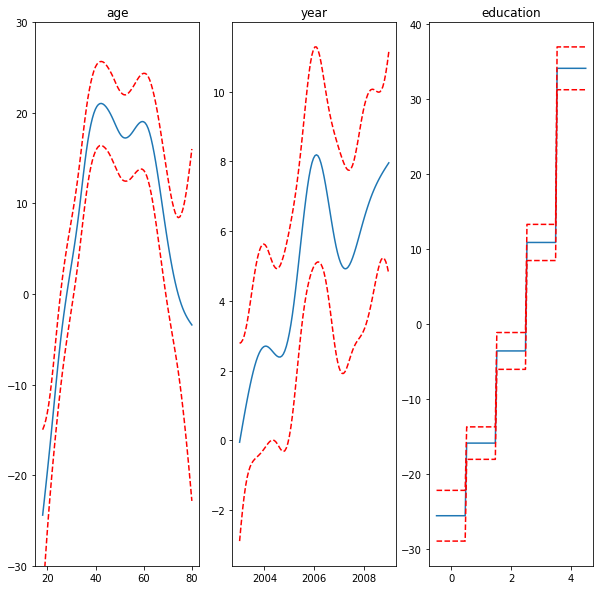

In [69]:
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)

## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['age', 'year', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [70]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2602
Link Function:                     IdentityLink Log Likelihood:                                -24116.7451
Number of Samples:                         3000 AIC:                                            48274.0107
                                                AICc:                                           48274.2999
                                                GCV:                                             1250.3656
                                                Scale:                                           1235.9245
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


<Figure size 720x720 with 0 Axes>

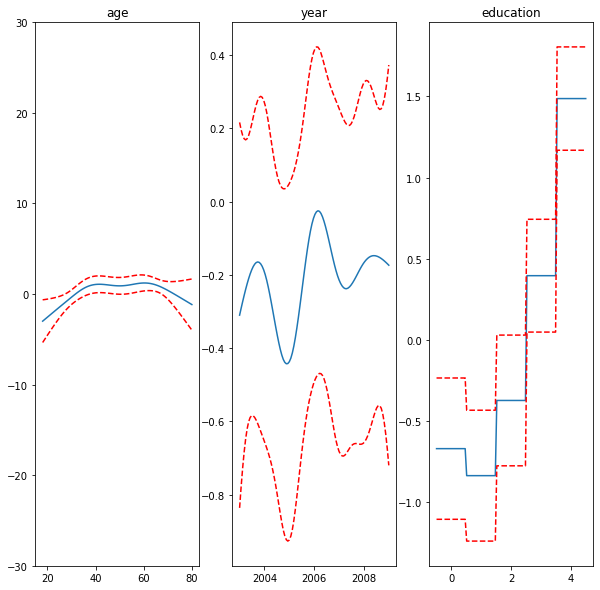

In [76]:
gam = LogisticGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y_age)

## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['age', 'year', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [77]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     13.2534
Link Function:                        LogitLink Log Likelihood:                                  -304.7505
Number of Samples:                         3000 AIC:                                              636.0079
                                                AICc:                                             636.1536
                                                UBRE:                                               2.2155
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1657
Feature Function                  Lam

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [38]:

gam2=gam(I(wage>250)~s(age,df=4)+s(year,df=4)+education,data=Wage,family=binomial)
plot(gam2)



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2992
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                          1247.4
Method:                          IRLS   Log-Likelihood:                -14946.
Date:                Thu, 02 Apr 2020   Deviance:                   3.7321e+06
Time:                        16:44:37   Pearson chi2:                 3.73e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            47.3964      1.466     32.320      0.000      44.522      50.271
cr(age, df=4)[0]    -16.0894      3.065     -5.249      0.000     -22.097     -10.082
cr(age, df=4)[1]     25.4239      1.804     14.093      0.000      21.888      28.960
cr(age, df=4)[2]     25.2202      1.883     13.395      0.000      21.530      28.911
cr(age, df=4)[3]     12.8417      6.129      2.095      0.036       0.829      24.854
cr(year, df=4)[0]     7.3879      1.344      5.498      0.000       4.754      10.021
cr(year, df=4)[1]    11.6303      1.216      9.563      0.000       9.247      14.014
cr(year, df=4)[2]    13.4462      1.272     10.570      0.000      10.953      15.939
cr(year, df=4)[3]    14.9320      1.488     10.033      0.000      12.015      17.849
education            15.3336      0.535     28.686      0.000      14.286      16.381
=====================================================================================
"""